### Pyplot - vježbe

U ovim vježbama kombinirat ćemo biblioteke numpy i pyplot kako bi ilustrirali neke zanimljive matematičke teoreme. Znanje matematike nije bitno niti će se ono ispitivati, ali predstavlja izvrsno okruženje za ponavljanje biblioteka numpy i pyplot.

Za početak pogledajmo kako iz uniformne distribucije, generirati normalnu distribuciju. Najčešće trebamo veći broj elemenata distribucije, te bi ovo htjeli efikasno napraviti. Postoji efikasan [Box-Muller](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) algoritam koji rješava ovaj problem. Na nama je da ga vektoriziramo i prikažemo kako on radi

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

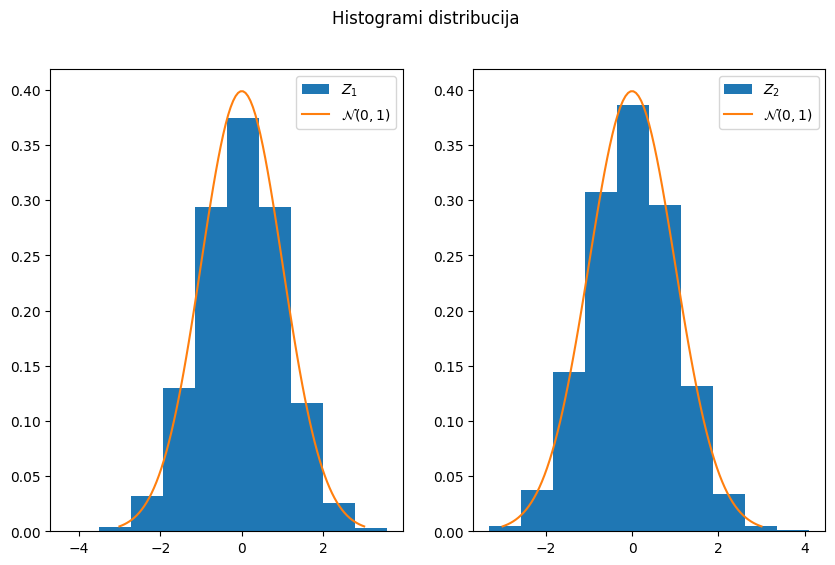

In [20]:
n = 10000
u_1 = np.random.uniform(0,1,n)
u_2 = np.random.uniform(0,1,n)

z_1 = np.sqrt(-2 * np.log(u_1)) * np.cos(2 * np.pi * u_2)
z_2 = np.sqrt(-2 * np.log(u_1)) * np.sin(2 * np.pi * u_2)


ls = np.linspace(-3,3,100)

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(z_1, bins=10, density=True, label='$Z_1$')
plt.plot(ls, norm.pdf(ls, 0, 1), label='$\mathcal{N}(0,1)$')
plt.legend()



plt.subplot(1,2,2)
plt.hist(z_2, bins=10, density=True, label='$Z_2$')
plt.plot(ls, norm.pdf(ls, 0, 1), label='$\mathcal{N}(0,1)$')
plt.legend()

fig.suptitle('Histogrami distribucija')


plt.show()

Nakon ovog zanimljivog rezultata iz statističkog modeliranja vrijeme je da se dotaknemo jednog problema s kojim ćemo se često susretati prilikom regularizacije. Naime želim vidjeti kako izgledaju različite norme vektora, konkretno $L_2$ i $L_1$ norme. To će nam biti bitno za razumijevanje razlika između različitih regularizacija

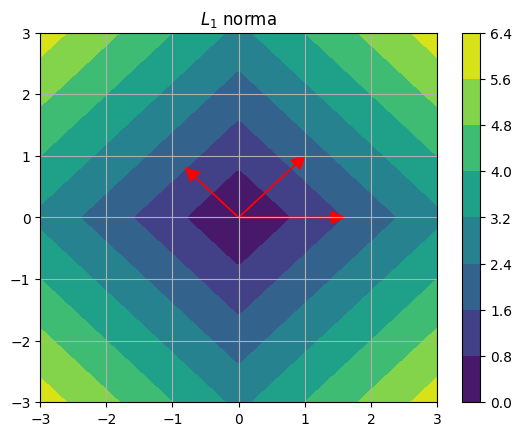

In [42]:
# L1 norm

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)

z_l1 = np.abs(x) + np.abs(y)  

plt.contourf(x, y, z_l1)  # draws contour plot
plt.grid()
plt.title('$L_1$ norma')
plt.colorbar()

plt.arrow(0,0,1,1, color='red', head_length=0.2, head_width=0.2, length_includes_head=True)
plt.arrow(0,0,1.6,0, color='red', head_length=0.2, head_width=0.2, length_includes_head=True)
plt.arrow(0,0,-0.8,0.8, color='red', head_length=0.2, head_width=0.2, length_includes_head=True)

plt.show()

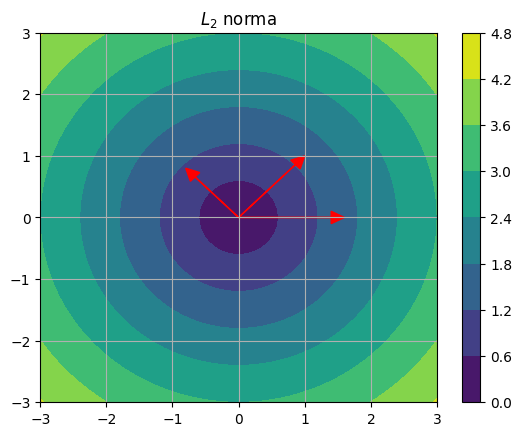

In [44]:
# L2 norm

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)

z_l2 = np.sqrt(np.square(x) + np.square(y))  

plt.contourf(x, y, z_l2)  # draws contour plot
plt.grid()
plt.title('$L_2$ norma')
plt.colorbar()

plt.arrow(0,0,1,1, color='red', head_length=0.2, head_width=0.2, length_includes_head=True)
plt.arrow(0,0,1.6,0, color='red', head_length=0.2, head_width=0.2, length_includes_head=True)
plt.arrow(0,0,-0.8,0.8, color='red', head_length=0.2, head_width=0.2, length_includes_head=True)

plt.show()

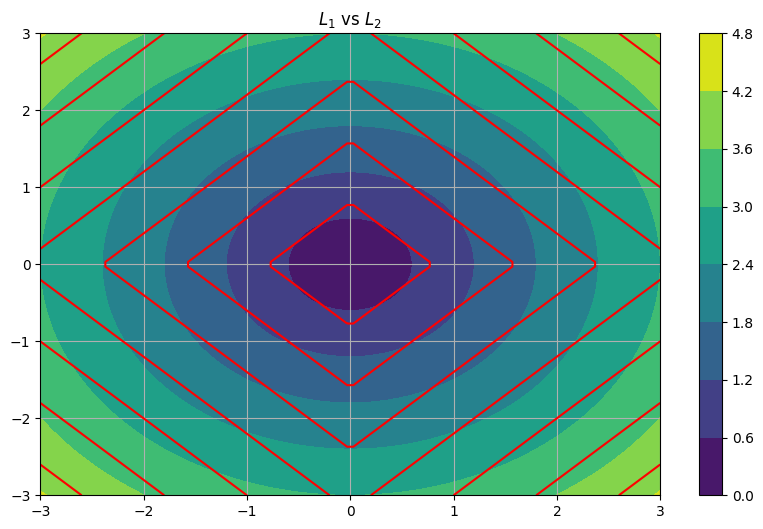

In [57]:
fig = plt.figure(figsize=(10, 6))
plt.contourf(x, y, z_l2)  
plt.colorbar()
plt.contour(x, y, z_l1, colors='r')
plt.grid()

plt.title('$L_1$ vs $L_2$')
plt.show()

U strojnom učenju (a i šire) često se susrećemo s problemom opasnog naziva "prokletstvo dimenzionalnosti". No što je ustvari to? To je pojava da povećanjem dimenzionalnosti (u našem slučaju podatka) udaljenosti između njih rastu i sve više gube diskriminatornu ulogu. Intuitivno, dvije točke u 2d prostoru su sličnije što su bliže. Na sljedećoj [poveznici](https://stats.stackexchange.com/a/179126) možete razviti dobru intuiciju odakle taj problem dolazi.Pogledajmo što se događa s udaljenostima rastom dimenzionalnosti prostora

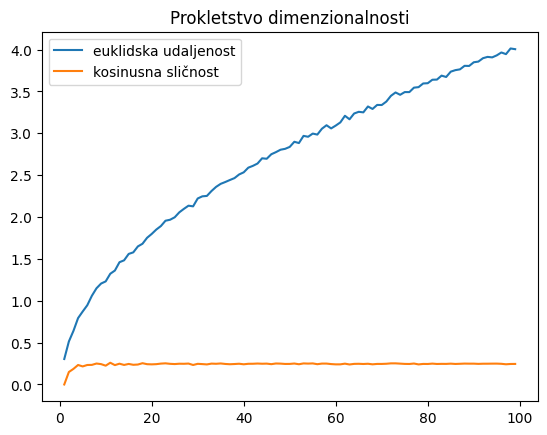

In [79]:
from sklearn.metrics.pairwise import pairwise_distances


avg_e = []
avg_cos = []
max_dim = 100
for i in range(1,max_dim): #
    vectors = np.random.random(size=(100, i))
    e_dist = pairwise_distances(vectors)
    cos_dist = pairwise_distances(vectors, metric='cosine')

    avg_e.append(np.mean(e_dist))
    avg_cos.append(np.mean(cos_dist))


plt.plot(np.arange(1,max_dim,1), avg_e, label='euklidska udaljenost')
plt.plot(np.arange(1,max_dim,1), avg_cos, label='kosinusna sličnost')
plt.title('Prokletstvo dimenzionalnosti')
plt.legend()
plt.show()